In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [93]:
df = pd.read_csv('sales.csv')
display(df.head())
print(df.shape)

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


(1000, 13)


In [94]:
df.duplicated().sum()

0

In [95]:
df['Date'] = df['Date'].apply( lambda x : datetime.strptime(x, '%m/%d/%Y').date())

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Invoice ID    1000 non-null int64
Date          1000 non-null object
Time          1000 non-null object
Gender        1000 non-null object
Location      1000 non-null object
City          1000 non-null object
Member        1000 non-null object
Category      1000 non-null object
Price         1000 non-null int64
Quantity      1000 non-null int64
Total         1000 non-null int64
Payment       1000 non-null object
Rating        1000 non-null int64
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [97]:
sale_df = df.copy()
sale_df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,2018-01-25,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,2018-03-19,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2018-02-25,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,2018-01-22,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2018-02-18,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [98]:
sale_df['Price'] = sale_df['Price'].astype('float')
sale_df['Quantity'] = sale_df['Quantity'].astype('float')
sale_df['Total'] = sale_df['Total'].astype('float')
sale_df["Date"]=pd.to_datetime(sale_df["Date"],format="%Y-%m-%d")

In [99]:
sale_df["weekday"] = sale_df["Date"].dt.weekday_name
sale_df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,weekday
0,460489604,2018-01-25,16:46,Male,Brookfield,NewYork,Yes,Groceries,30.0,1.0,30.0,Cash,2,Thursday
1,471006167,2018-03-19,16:48,Female,Water tower,Chicago,Yes,Fashion,35.0,5.0,175.0,Card,3,Monday
2,411909258,2018-02-25,13:33,Male,Water tower,Chicago,No,Clothing,57.0,2.0,114.0,Cash,5,Sunday
3,487313402,2018-01-22,13:38,Female,Park lane,Dallas,Yes,Sporting,89.0,4.0,356.0,Gpay,1,Monday
4,197763430,2018-02-18,15:31,Female,Park lane,Dallas,No,Books,82.0,5.0,410.0,Cash,4,Sunday


In [100]:
sale_df = sale_df.sort_values(by = "Date", ascending = True)
sale_df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,weekday
469,333840821,2018-01-01,15:52,Male,Water tower,Chicago,Yes,Sporting,93.0,3.0,279.0,Card,4,Monday
584,522650837,2018-01-01,19:07,Male,Water tower,Chicago,Yes,Clothing,59.0,1.0,59.0,Gpay,1,Monday
847,987110291,2018-01-01,11:39,Male,Park lane,Dallas,No,Clothing,57.0,2.0,114.0,Cash,5,Monday
748,140416946,2018-01-01,15:55,Female,Park lane,Dallas,No,Furniture,45.0,1.0,45.0,Gpay,4,Monday
489,416916918,2018-01-01,17:04,Female,Park lane,Dallas,Yes,Books,83.0,7.0,581.0,Gpay,4,Monday


In [101]:
sale_df = sale_df.reset_index(drop = True)
sale_df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,weekday
0,333840821,2018-01-01,15:52,Male,Water tower,Chicago,Yes,Sporting,93.0,3.0,279.0,Card,4,Monday
1,522650837,2018-01-01,19:07,Male,Water tower,Chicago,Yes,Clothing,59.0,1.0,59.0,Gpay,1,Monday
2,987110291,2018-01-01,11:39,Male,Park lane,Dallas,No,Clothing,57.0,2.0,114.0,Cash,5,Monday
3,140416946,2018-01-01,15:55,Female,Park lane,Dallas,No,Furniture,45.0,1.0,45.0,Gpay,4,Monday
4,416916918,2018-01-01,17:04,Female,Park lane,Dallas,Yes,Books,83.0,7.0,581.0,Gpay,4,Monday


In [102]:
sale_df.describe()

,Invoice ID,Price,Quantity,Total,Rating
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.944931e+08,51.112000,4.059000,207.788000,2.972000
std,2.870685e+08,28.912443,2.027716,165.626167,1.428025
min,6.614050e+05,1.000000,1.000000,1.000000,1.000000
25%,2.508726e+08,27.000000,2.000000,72.000000,2.000000
50%,4.781491e+08,51.000000,4.000000,174.000000,3.000000
75%,7.459453e+08,76.250000,6.000000,304.500000,4.000000
max,9.996658e+08,100.000000,7.000000,693.000000,5.000000


### Monthly Sales

In [103]:
totalNum = sale_df.shape[0]
totalNum

1000

In [104]:
days = (sale_df["Date"][totalNum-1]-sale_df["Date"][0]).days
months = round(days/30,2)
months

2.93

### Monthly Amounts

In [105]:
kpi_1 = round(totalNum/months,2)
kpi_1

341.3

In [106]:
totalSale = sale_df["Total"].sum()
totalSale

207788.0

In [107]:
kpi_2 = round(totalSale/months,2)
kpi_2

70917.41

### Monthly Spend per Customer

In [108]:
kpi_3 = round(totalSale/totalNum)
kpi_3

208.0

### Plotting Time

In [109]:
market = sale_df

market.index = market["Date"]
market.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,weekday
Date,,,,,,,,,,,,,,
2018-01-01,333840821,2018-01-01,15:52,Male,Water tower,Chicago,Yes,Sporting,93.0,3.0,279.0,Card,4,Monday
2018-01-01,522650837,2018-01-01,19:07,Male,Water tower,Chicago,Yes,Clothing,59.0,1.0,59.0,Gpay,1,Monday
2018-01-01,987110291,2018-01-01,11:39,Male,Park lane,Dallas,No,Clothing,57.0,2.0,114.0,Cash,5,Monday
2018-01-01,140416946,2018-01-01,15:55,Female,Park lane,Dallas,No,Furniture,45.0,1.0,45.0,Gpay,4,Monday
2018-01-01,416916918,2018-01-01,17:04,Female,Park lane,Dallas,Yes,Books,83.0,7.0,581.0,Gpay,4,Monday


### Month

In [110]:
month_sale = market.groupby(market.index.month)


total_month_sale = month_sale["Total"].sum()
total_month_sale = total_month_sale.sort_values(ascending=False)
total_month_sale

Date
3    72286.0
1    71652.0
2    63850.0
Name: Total, dtype: float64

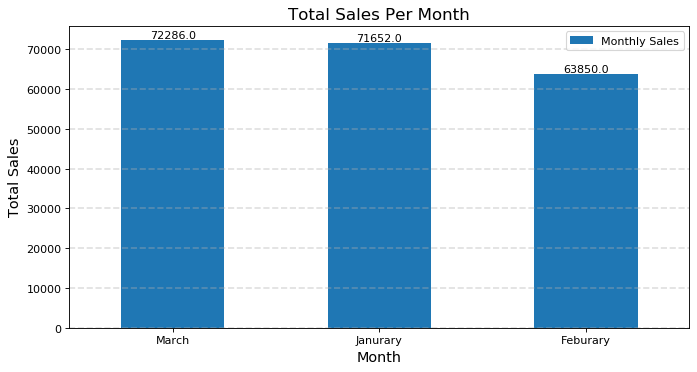

In [111]:
plt.figure(figsize = (10,5),dpi = 80)

total_month_sale.plot(kind = 'bar', label = 'Monthly Sales')

plt.xlabel('Month', fontsize = 13)
plt.ylabel('Total Sales', fontsize = 13)

xticks = ['March',"Janurary","Feburary"]
plt.xticks(range(len(total_month_sale.index)),xticks,rotation=0,fontsize=10)

for a,b in zip(range(len(total_month_sale.index)),total_month_sale.values):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=10)
    
    
plt.legend(loc='best')
plt.grid(alpha=0.4,axis="y",linestyle="--",linewidth=1.5)
plt.title("Total Sales Per Month",fontsize=15)
plt.show()

### Weekday

In [112]:
week_sale = market.groupby('weekday')['Total'].sum()
week_sale = week_sale.sort_values(ascending = False)
week_sale

weekday
Friday       34128.0
Monday       32414.0
Thursday     30940.0
Tuesday      28626.0
Saturday     28444.0
Wednesday    28246.0
Sunday       24990.0
Name: Total, dtype: float64

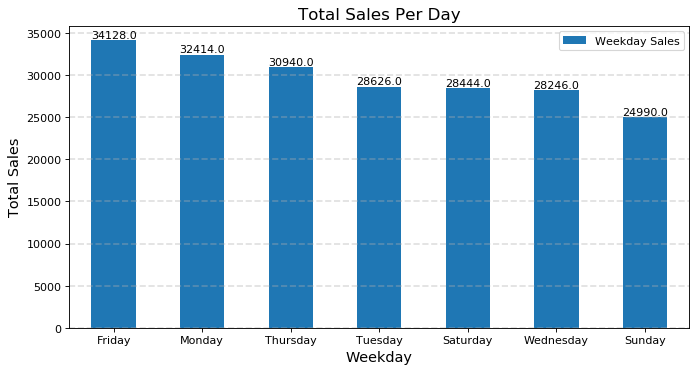

In [113]:
plt.figure(figsize = (10,5),dpi = 80)

week_sale.plot(kind = 'bar', label = 'Weekday Sales')

plt.xlabel('Weekday', fontsize = 13)
plt.ylabel('Total Sales', fontsize = 13)

plt.xticks(rotation=0,fontsize=10)

for a,b in zip(range(len(week_sale.index)),week_sale.values):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=10)
    
    
plt.legend(loc='best')
plt.grid(alpha=0.4,axis="y",linestyle="--",linewidth=1.5)
plt.title("Total Sales Per Day",fontsize=15)
plt.show()

### Day

In [114]:
day_sale = market.groupby(by = market.index)['Total'].sum()
day_sale = day_sale.sort_index(ascending = True)
day_sale

Date
2018-01-01    2649.0
2018-01-02    2166.0
2018-01-03    2374.0
2018-01-04    1192.0
2018-01-05    1773.0
               ...  
2018-03-26    2122.0
2018-03-27    2716.0
2018-03-28    2412.0
2018-03-29    1944.0
2018-03-30    2070.0
Name: Total, Length: 89, dtype: float64

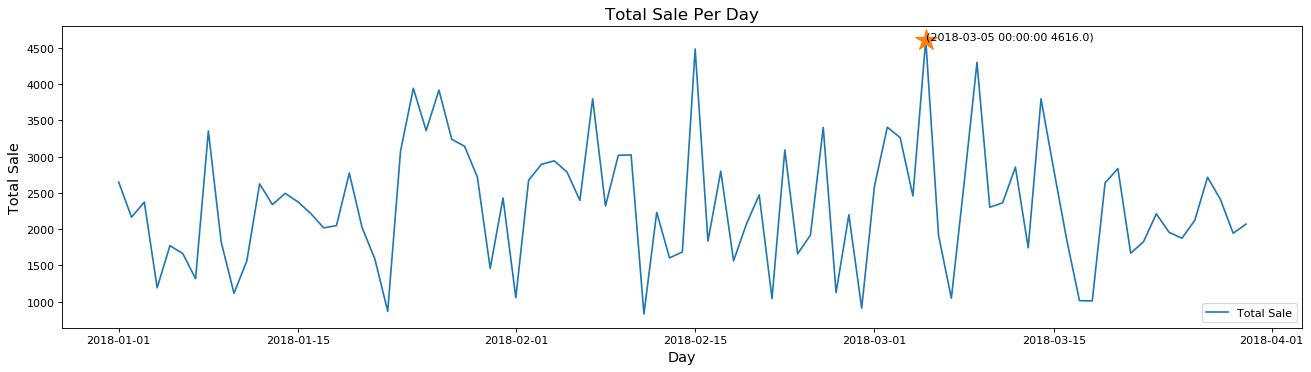

<Figure size 432x288 with 0 Axes>

In [116]:
plt.figure(figsize=(20,5),dpi=80)

plt.plot(day_sale,label= 'Total Sale')

max_index = day_sale.idxmax()

plt.plot(max_index,day_sale[max_index],"*",markersize = 20)

show_max='('+str(max_index)+' '+str(day_sale[max_index])+')'

plt.annotate(show_max,xytext=(max_index,day_sale[max_index]),xy=(max_index,day_sale[max_index]))

plt.xlabel("Day",fontsize=13)
plt.ylabel("Total Sale",fontsize=13)
plt.xticks(fontsize=10)
plt.legend(loc='lower right')
plt.title("Total Sale Per Day",fontsize=15)

plt.show()
plt.tight_layout()


### Top 10 Category 